# Count time-based keyword frequency

To draw daily line chart on a web page, we need to count date-based frequency.

    The data format for the line chart is as follows.

    [{'x': '2020-03-05', 'y': 1},
    {'x': '2020-03-06', 'y': 0},
    {'x': '2020-03-07', 'y': 0},
    {'x': '2020-03-08', 'y': 0},
    {'x': '2020-03-09', 'y': 0},
    {'x': '2020-03-10', 'y': 5},
    {'x': '2020-03-11', 'y': 5},
    {'x': '2020-03-12', 'y': 7},
    {'x': '2020-03-13', 'y': 62},
    {'x': '2020-03-14', 'y': 29}]

# Load data

In [2]:
import pandas as pd
from datetime import datetime,timedelta

In [3]:
df = pd.read_csv('./cna_news_preprocessed.csv',sep='|')

In [4]:
df.head(1)

,item_id,date,category,title,content,sentiment,summary,top_key_freq,tokens,tokens_v2,entities,token_pos,link,photo_link
0,index.php?k=1_2025-03-27_1,2025-03-27,PC,多平台\n《餓狼傳說 City of the Wolves》足球界傳奇巨星「克里斯蒂亞諾‧羅...,株式會社 SNK 今日（3/27）宣布，足球界傳奇巨星「克里斯蒂亞諾‧羅納度」確定將以可遊玩...,暫無,暫無,"[('遊戲', 8), ('足球', 8), ('傳說', 7), ('角色', 6), (...","['株式會社', ' SNK ', '今日', '（', '3/27', '）', '宣布'...","['株式會社', '宣布', '足球界', '傳奇', '巨星', '克里斯蒂亞諾‧羅納度'...","[NerToken(word='株式會社', ner='ORG', idx=(0, 4)),...","[('株式會社', 'Nc'), (' SNK ', 'FW'), ('今日', 'Nd')...",https://gnn.gamer.com.tw/detail.php?sn=282906,https://p2.bahamut.com.tw/B/2KU/58/2fc0d3915aa...


# Filter data using token_v2 or content column

In [5]:
from datetime import datetime, timedelta
# Searching keywords from "content" column
# Here this function uses df.content column, while filter_dataFrame() uses df.tokens_v2
def filter_dataFrame(user_keywords, cond, cate, weeks):

    # end date: the date of the latest record of news
    end_date = df.date.max()
    
    # start date
    start_date = (datetime.strptime(end_date, '%Y-%m-%d').date() - timedelta(weeks=weeks)).strftime('%Y-%m-%d')

    # (1) proceed filtering: a duration of a period of time
    # 期間條件
    period_condition = (df.date >= start_date) & (df.date <= end_date) 
    
    # (2) proceed filtering: news category
    # 新聞類別條件
    if (cate == "全部"):
        condition = period_condition  # "全部"類別不必過濾新聞種類
    else:
        # category新聞類別條件
        condition = period_condition & (df.category == cate)

    # (3) proceed filtering: keywords 
    # and or 條件
    if (cond == 'and'):
        # query keywords condition使用者輸入關鍵字條件and
        condition = condition & df.content.apply(lambda text: all((qk in text) for qk in user_keywords)) #寫法:all()
    elif (cond == 'or'):
        # query keywords condition使用者輸入關鍵字條件
        condition = condition & df.content.apply(lambda text: any((qk in text) for qk in user_keywords)) #寫法:any()
    # condiction is a list of True or False boolean value
    df_query = df[condition]

    return df_query


### Now we do filtering news

In [ ]:
# user_keywords=['肺炎','冠狀','疫情']
# cond='and'
# cate='全部'
# weeks=4
# df_query = filter_dataFrame(user_keywords, cond, cate, weeks)

In [ ]:
user_keywords=['烏克蘭','俄羅斯']
cond='or'
cate='全部'
weeks=4
df_query = filter_dataFrame(user_keywords, cond, cate, weeks)
len(df_query)

0

In [ ]:
df_query.head(1)

,item_id,date,category,title,content,sentiment,summary,top_key_freq,tokens,tokens_v2,entities,token_pos,link


# All-in-one function: Get time-based keyword frequency

In [6]:
def get_keyword_time_based_freq(df_query):
    date_samples = df_query.date
    query_freq = pd.DataFrame({'date_index':pd.to_datetime( date_samples ),'freq':[1 for _ in range(len(df_query))]})
    data = query_freq.groupby(pd.Grouper(key='date_index',freq='D')).sum()
    time_data=[]
    for i, date_idx in enumerate(data.index):
        row = {'x':date_idx.strftime('%Y-%m-%d'),'y':int(data.iloc[i].freq)}
        time_data.append(row)
    return time_data

In [ ]:
user_keywords=['烏克蘭','俄羅斯']
cond='or'
cate='全部'
weeks=4
df_query = filter_dataFrame(user_keywords, cond, cate, weeks)
len(df_query)

0

In [ ]:
result = get_keyword_time_based_freq(df_query)

In [ ]:
result

[]

In [ ]:
len(result)

0

# Demonstration step by step

# Time-based frequency

    We need the daily frequency data:

    [{'x': '2020-02-24', 'y': 1},
    {'x': '2020-02-25', 'y': 0},
    {'x': '2020-02-26', 'y': 1},
    {'x': '2020-02-27', 'y': 1},
    {'x': '2020-02-28', 'y': 0},
    {'x': '2020-02-29', 'y': 0},
    {'x': '2020-03-01', 'y': 0},
    {'x': '2020-03-02', 'y': 2},
    {'x': '2020-03-03', 'y': 1}]

## Assign frequency value of 1 to each news

        date_index  freq
    0	2020-03-20	1
    1	2020-03-20	1
    2	2020-03-13	1
    3	2020-03-19	1
    4	2020-03-17	1

In [7]:
# done with one line:
query_freq = pd.DataFrame({'date_index':pd.to_datetime( df_query.date ),'freq':[1 for _ in range(len(df_query))]})

NameError: name 'df_query' is not defined

In [ ]:
query_freq

,date_index,freq


### How to make it?

In [ ]:
{'key':['one','two','three'], 'value':[1,2,3]}

{'key': ['one', 'two', 'three'], 'value': [1, 2, 3]}

In [ ]:
pd.DataFrame({'key':['one','two','three'], 'value':[1,2,3]})

,key,value
0,one,1
1,two,2
2,three,3


In [ ]:
{'date_index':pd.to_datetime( df_query.date ),'freq':[1 for _ in range(len(df_query))]}

{'date_index': Series([], Name: date, dtype: datetime64[ns]), 'freq': []}

In [ ]:
df_query.date # date is string format

Series([], Name: date, dtype: object)

In [ ]:
# convert to datetime format
pd.to_datetime( df_query.date )

Series([], Name: date, dtype: datetime64[ns])

In [ ]:
[1 for _ in range(len(df_query))]

[]

In [ ]:
# dict format 
{'date_index':pd.to_datetime( df_query.date ),'freq':[1 for _ in range(len(df_query))]}

{'date_index': Series([], Name: date, dtype: datetime64[ns]), 'freq': []}

In [ ]:
# conver to dataframe
pd.DataFrame({'date_index':pd.to_datetime( df_query.date ),'freq':[1 for _ in range(len(df_query))]})

,date_index,freq


In [ ]:
query_freq = pd.DataFrame({'date_index':pd.to_datetime( df_query.date ),'freq':[1 for _ in range(len(df_query))]})

## Daily frequency

### We use pd.Grouper(). It is very powerful.

In [ ]:
query_freq.groupby(pd.Grouper(key='date_index',freq='D')).sum()

,freq
date_index,


In [ ]:
pd.Grouper(key='date_index',freq='D')

TimeGrouper(key='date_index', freq=<Day>, axis=0, sort=True, dropna=True, closed='left', label='left', how='mean', convention='e', origin='start_day')

## Week-based frequency

In [ ]:
query_freq.groupby(pd.Grouper(key='date_index',freq='W')).sum()

,freq
date_index,


## draw freqency line chart

In [ ]:
# data = query_freq.groupby(pd.Grouper(key='date_index',freq='D')).sum()[['freq']]
data = query_freq.groupby(pd.Grouper(key='date_index',freq='D')).sum()[['freq']]

In [ ]:
data

,freq
date_index,


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

ValueError: zero-size array to reduction operation fmin which has no identity

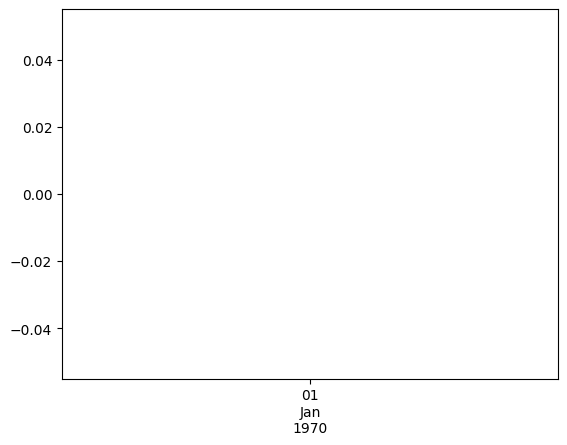

In [ ]:
data.plot()

## Prepare data format for JavaScrip line chart on Django website

In [ ]:
data.head(2)

,freq
date_index,
2022-03-09,1
2022-03-10,0


In [ ]:
time_data=[]
for i, date_idx in enumerate(data.index):
    row = {'x':date_idx.strftime('%Y-%m-%d'),'y':int(data.iloc[i].freq)}
    time_data.append(row)

In [ ]:
time_data

[{'x': '2022-03-09', 'y': 1},
 {'x': '2022-03-10', 'y': 0},
 {'x': '2022-03-11', 'y': 1},
 {'x': '2022-03-12', 'y': 0},
 {'x': '2022-03-13', 'y': 2},
 {'x': '2022-03-14', 'y': 22}]

# All-in-one function: Get time-based keyword frequency

# views.py for app_user_keyword